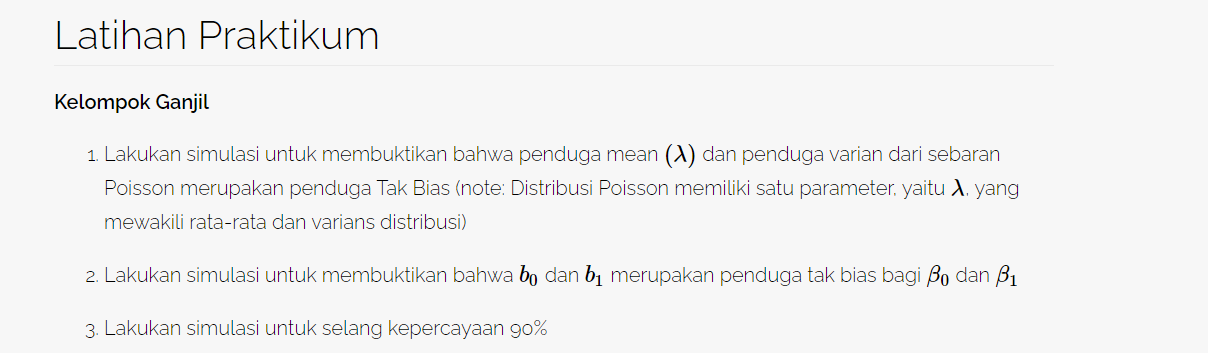

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1

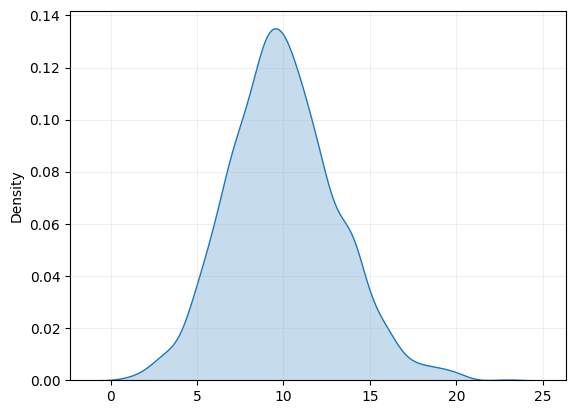

In [36]:
#Misal lambda 10
lam=10; popsize=2000
population=[np.random.poisson(lam) for i in range(popsize)]

sns.kdeplot(population, fill=True)
plt.grid("on", alpha=0.2)

In [82]:
#penduga mean dan penduga varian
population_mean = np.mean(population)
population_var = np.var(population)

In [87]:
iter=500; samplesize=20
sample_mean=[]; sample_var=[]
for i in range(iter):
    sample_mean.append(np.mean(np.random.choice(population, samplesize)))
    sample_var.append(np.var(np.random.choice(population, samplesize)))
sample_mean=np.mean(sample_mean)
sample_var=np.mean(sample_var)

In [88]:
pd.DataFrame([[population_mean, population_var],[sample_mean, sample_var]],columns=["mean", "var"], index=["population", "sample"])

,mean,var
population,9.9585,9.681778
sample,9.9575,9.159100


Sehingga dapat dikatakan

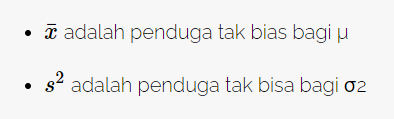

# 2

In [ ]:
# masih pakai poisson
# misal beta_0= 10, beta_1=20

In [108]:
# Populasi
from sklearn.linear_model import LinearRegression
beta_0 = 10; beta_1 = 20
X_pop=np.array(population).reshape(-1,1)
y_pop=[beta_0+i*beta_1 for i in population]

model=LinearRegression()
model.fit(X_pop, y_pop)
print(model.coef_)
print(model.intercept_)

[20.]
9.999999999999801


In [114]:
import numpy as np

n = 20  # ukuran contoh
k = 500  # ulangan

sample_beta_0=[]; sample_beta_1=[]

for i in range(k):
    x_sample = np.random.choice(population, n).reshape(-1,1)
    y_sample = [beta_0+i*beta_1 for i in x_sample]
    model=LinearRegression()
    model.fit(x_sample, y_sample)
    sample_beta_0.append(model.intercept_)
    sample_beta_1.append(model.coef_[0])
    
sample_beta_0=np.mean(sample_beta_0); sample_beta_1=np.mean(sample_beta_1)

In [116]:
print(f'Beta_0 dari sample: {sample_beta_0}')
print(f'Beta_1 dari sample: {sample_beta_1}')

Beta_0 dari sample: 10.000000000000002
Beta_1 dari sample: 20.0


# 3

In [137]:
from scipy.stats import norm

n    = 20  #jumlah sampel
k    = 500 #ulangan
alpha  = 0.10

z = norm.ppf(1 - alpha / 2)

np.random.seed(503)

SKlower=[]; skupper=[]
for i in range(k):
    x_sample = np.random.choice(population, n).reshape(-1,1)
    xbar = np.mean(x_sample)
    s = np.std(x_sample)
    
    SE = s / np.sqrt(n)
    
    SKlower.append(xbar - z * SE)
    skupper.append(xbar + z * SE)

In [143]:
print(f'SKlower:   {np.mean(SKlower)}\nSkupper:   {np.mean(skupper)}')

SKlower:   8.851835275590911
Skupper:   11.04596472440909
